## Case Study on Correlation and Regression

### A textile company regularly spent money on five advertising companies for their ads. Perform a case study on the company's sales dataset.

1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
2. Build a regression model to predict the profit from the given data and comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
- Add1(in Thousands) 290
- Add2(in Thousands) 312
- Add3(in Thousands) 309
- Add4(in Thousands) 298
- Add5(in Thousands) 320

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset "Add_sales_data_2018.csv" to pandas DataFrame 'data'
data = pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


**Comments:  
The dataset contains 205 rows and 7 columns. Each row of the dataset contains information about advertising expenditure on a particular day and profit generated.**

In [3]:
#Understanding data types of each column
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


**Comments:  
Columns with index 1 to 6 are numerical values, whereas date is an object. None of the columns contain any missing values or null values.**

In [4]:
#Converting string object 'Date' to datetime object
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0     2018-10-08
1     2018-10-05
2     2018-10-04
3     2018-10-03
4     2018-10-01
         ...    
200   2017-12-14
201   2017-12-13
202   2017-12-12
203   2017-12-11
204   2017-12-08
Name: Date, Length: 205, dtype: datetime64[ns]

In [5]:
#Sort by date in descending order
data = data.sort_values(by='Date', ascending = False)

### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [6]:
#Statistical summary of columns of DataFrame
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


**Comments:  
The range of values in the numerical columns is observed to be nearly identical for all the companies.  
This indicates that the expenditure on advertisements is almost same. However average amount spent on Add2 is more when compared to others.  
It can be concluded that promotion charges for Add2 is more than other companies.  
Average Expenditure on Ads range from 208000 to 218000.  
The median and mean values are not skewed at all which indicates identical expenditure patterns throughout.**

In [7]:
#Exploratory Analysis and Visualization
#Setting default style and font sizes for charts.
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

Text(0.5, 1.0, 'Profit vs Date')

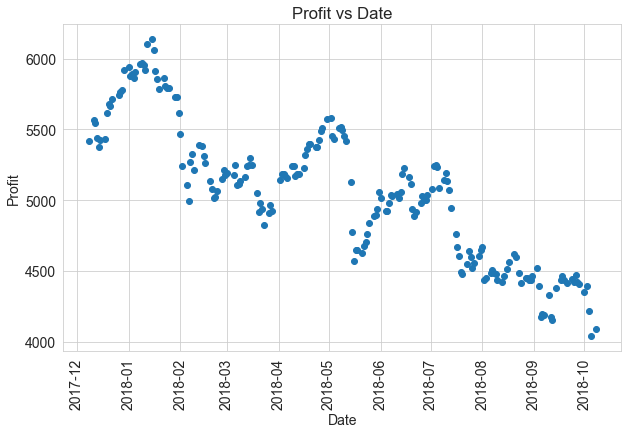

In [8]:
#scatter plot
plt.scatter(data["Date"], data["Profit(in Thousands)"])
plt.xlabel('Date')
plt.ylabel('Profit')
plt.xticks(rotation = 90)
plt.title("Profit vs Date")

Text(0.5, 1.0, 'Profit vs Date')

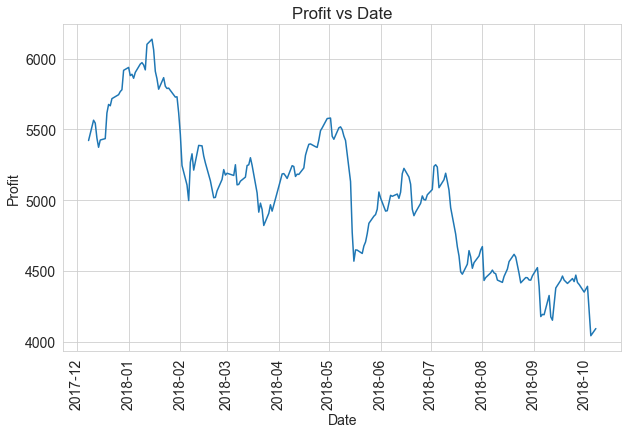

In [9]:
#line plot
plt.plot(data["Date"], data["Profit(in Thousands)"])
plt.xlabel('Date')
plt.ylabel('Profit')
plt.xticks(rotation = 90)
plt.title("Profit vs Date")

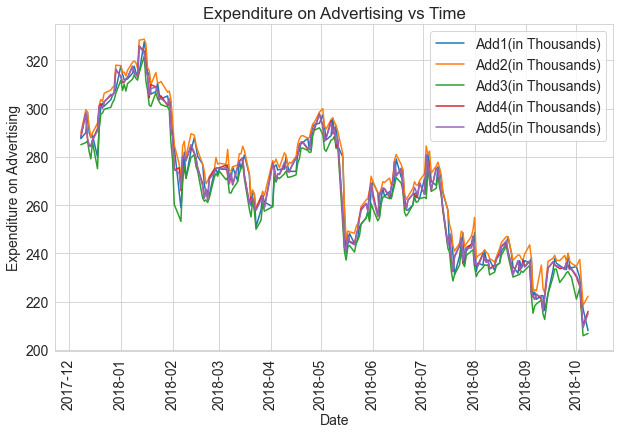

In [10]:
#selecting 5 columns of AddExpenditure as they are the independent(X) variable and plotting line plots
data_x=data.iloc[:,[1,2,3,4,5]]
plt.plot(data["Date"], data_x)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Expenditure on Advertising')
plt.title("Expenditure on Advertising vs Time")
plt.legend(data.iloc[:,[1,2,3,4,5]])
plt.show()

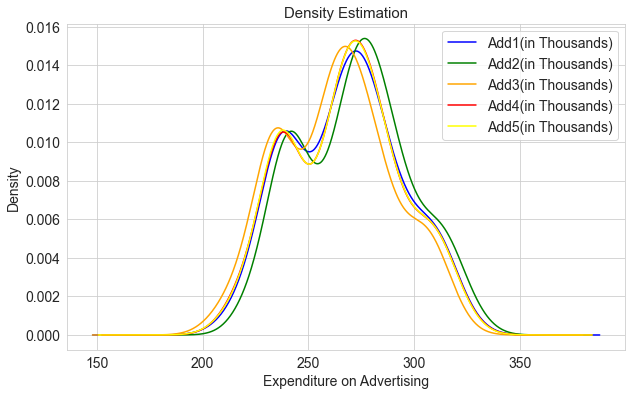

In [11]:
#kde plot
data_x.plot.kde(color = ["blue", "green", "orange", "red", "yellow"])
plt.title("Density Estimation", fontsize = 15)
plt.xlabel('Expenditure on Advertising')
plt.ylabel('Density')
plt.show()

**Comments:  
Kernel Density Estimate is a method used for visualizing the distribution of observations in a dataset.  
KDE represents the data using a continuous probability density curve.** 

**Here the maximum density distribution of advertising expenditure is between the range 250000 to 280000.** 

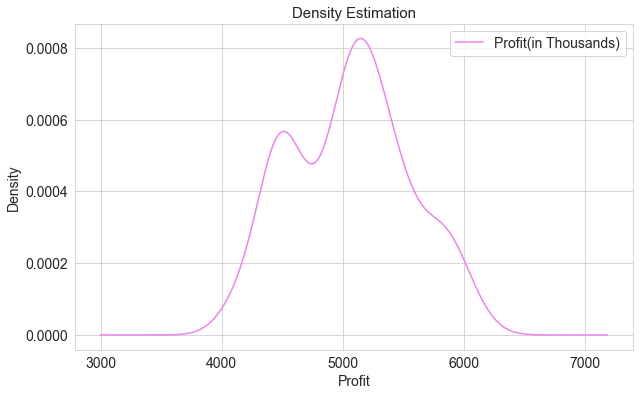

In [12]:
#kde-profit
data_xp=data.iloc[:,[6]]
data_xp.plot.kde(color = ["violet"])
plt.title("Density Estimation", fontsize = 15)
plt.xlabel('Profit')
plt.ylabel('Density')
plt.show()

**Comments:  
KDE of profit generated from sales is following the same pattern as KDE of Ads.  
It can be said that Ads are in direct proportion to the sales and hence profit.**

In [13]:
#per day analysis of Ads expense vs Profit generated
data_sumx = data_x.sum(axis = 1)
profit_rowx = data['Profit(in Thousands)']
print(data_sumx, profit_rowx)

0      1068.25
1      1060.95
2      1102.90
3      1147.30
4      1151.40
        ...   
200    1424.25
201    1433.95
202    1459.10
203    1471.65
204    1439.00
Length: 205, dtype: float64 0      4093.065
1      4042.448
2      4213.819
3      4391.665
4      4350.683
         ...   
200    5374.105
201    5439.655
202    5545.013
203    5565.444
204    5421.842
Name: Profit(in Thousands), Length: 205, dtype: float64


Text(0.5, 1.0, 'Profit vs Tot. Expenditure on Ads (Daily analysis)')

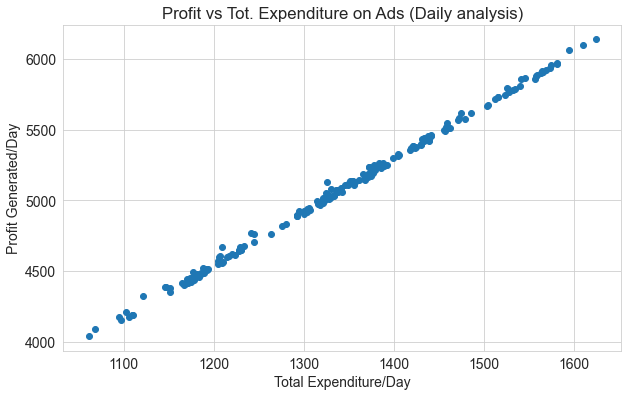

In [14]:
#scatterplot
plt.scatter(data_sumx, profit_rowx)
plt.xlabel('Total Expenditure/Day')
plt.ylabel('Profit Generated/Day')
plt.xticks(rotation = 0)
plt.title("Profit vs Tot. Expenditure on Ads (Daily analysis)")

**Comments:  
Total expenditure on ads range from 1000 to 1650 and the profit generated from sales shows a linear scale ranging from 4000 to 6300. Profit nearly 5 times amount spend for ads.**

In [15]:
#Total Expenditure on Ads vs Total Profit Generated(Yearly analysis)
data_sum0 = data_x.sum()
data_sum = data_sum0.sum()
profit_column = data['Profit(in Thousands)'].sum()
print(data_sum0, "\n Total Expenditure on Ads: ", data_sum, "\n Total Profit Generated: ", profit_column)

Add1(in Thousands)    54853.4
Add2(in Thousands)    55703.1
Add3(in Thousands)    53913.1
Add4(in Thousands)    54780.9
Add5(in Thousands)    54766.3
dtype: float64 
 Total Expenditure on Ads:  274016.8 
 Total Profit Generated:  1037224.198


**Comments:  
Total Annual Expenditure on Ads:  274016.8  
Total Annual Profit Generated:  1037224.198**

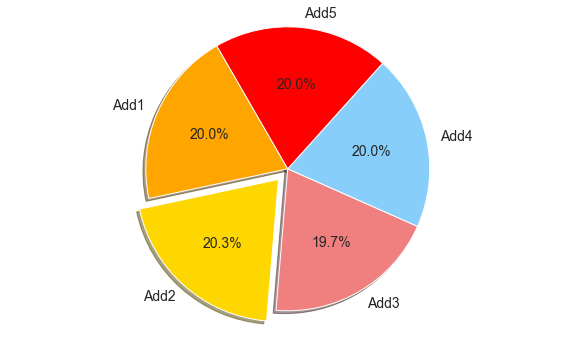

In [16]:
#piechart - spending patterns
labels = 'Add1', 'Add2', 'Add3', 'Add4', 'Add5'
sizes = [54853.4, 55703.1, 53913.1, 54780.9, 54766.3]
colors = ['orange' , 'gold', 'lightcoral', 'lightskyblue', 'red']
explode = (0,0.1,0,0,0)
plt.pie(sizes, explode=explode, labels = labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.show()

**Comments:  
Almost similar spending patterns on all advertising companies.**

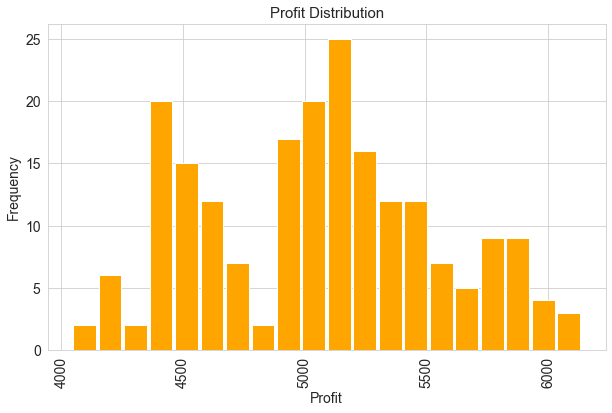

In [17]:
#Histogram of Profit distribution
dx = data['Profit(in Thousands)']
plt.hist(dx, bins = 20, rwidth = 0.9, color = "orange")
plt.title("Profit Distribution", fontsize = 15)
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.yticks()
plt.show()

**Comments:  
Profit distribution is maximum within the range 4900 to 5300.  
Average Profit generated from all sales throughout the year is around 5000000.**

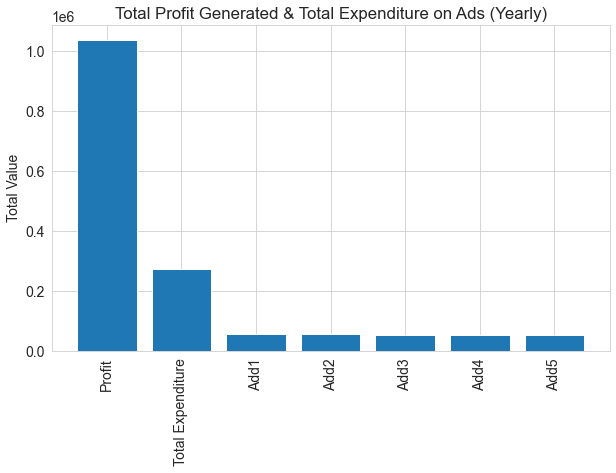

In [18]:
#Bar chart
labels = 'Profit', 'Total Expenditure', 'Add1', 'Add2', 'Add3', 'Add4', 'Add5'
values = [1037224.198, 274016.8,  54853.4, 55703.1, 53913.1, 54780.9, 54766.3]
plt.bar(labels, values)
plt.ylabel("Total Value")
plt.xticks(rotation = 90)
plt.title("Total Profit Generated & Total Expenditure on Ads (Yearly)")
plt.show()

**Comments:  
The total profit generated by the company can be said to be nearly 5 times the cost of advertising.**

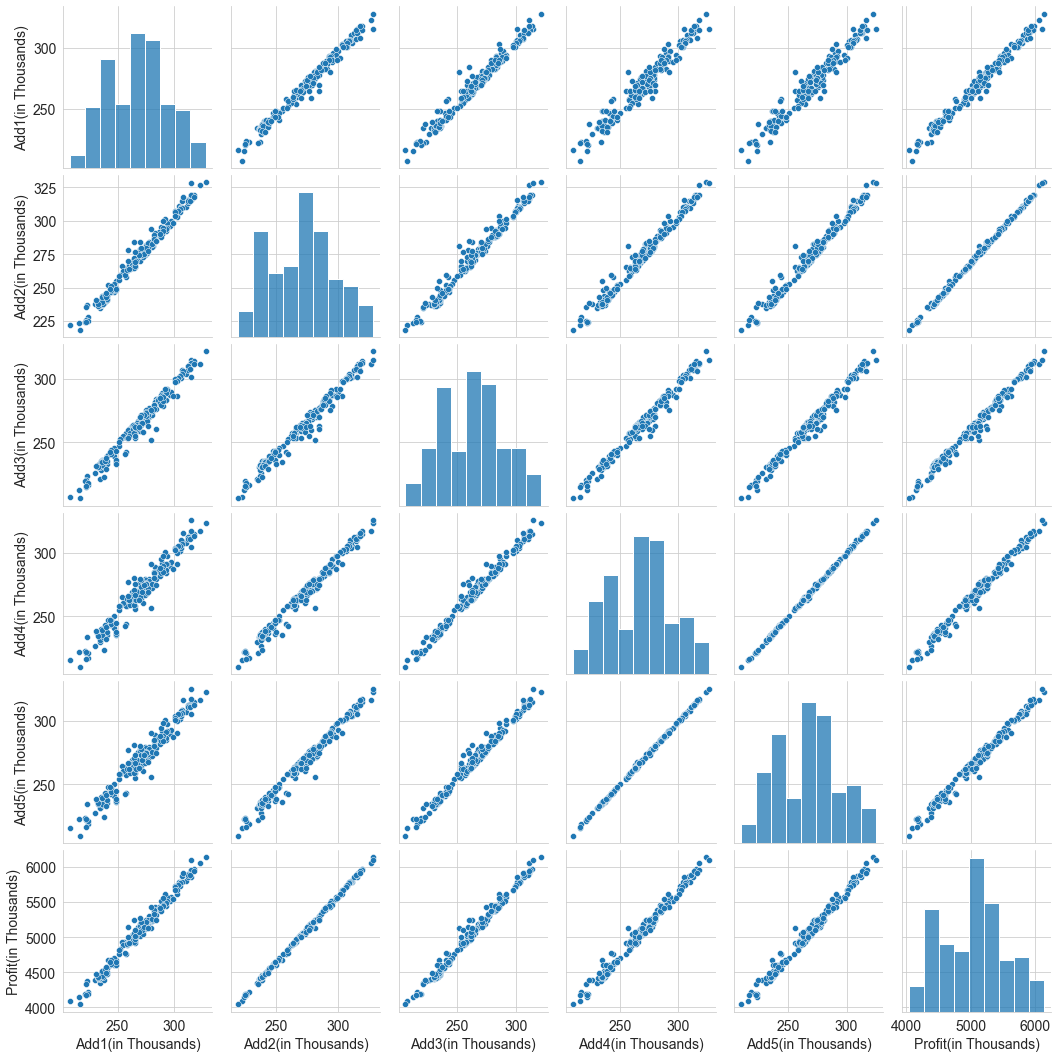

In [19]:
#pairplot
sns.pairplot(data)

**Comments:  
The chart between Add2 & Profit indicates a very strong linear relationship.  
No outliers for Add2 when compared to other Ad Companies.  
But on further observation it can be seen that profit generated is below mean value for Add2 when less money is spend on their Ads. 
Good money value returns are indicated for Add3 & Add1 companies for all ranges.  
Add4 & Add5 companies show a similar linear pattern.**

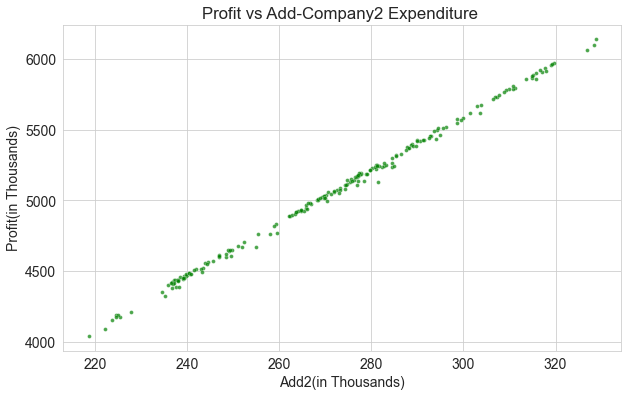

In [20]:
#scatterplot
plt.title('Profit vs Add-Company2 Expenditure ')
sns.scatterplot(data = data, x='Add2(in Thousands)', y='Profit(in Thousands)', alpha=0.7, s=15, color ="green");

**Comments:  
From the statistical analysis, the values in all columns are closely related to profit. Profit and expenditure on Ads have a linear relationship.  
This relationship is expressed numerically using a measure called the correlation coefficient, which can be computed using the '.corr' method of Pandas series.**

Notes:
The points seem to form a straight line.
If a line is plotted using these points, it can be used to predict profit for a given expenditure on Ads.
Line on the X & Y coordinates has the following formula: y = ax+b.
This technique is called Linear Regression Model, because it models the relationship between Ads and Profit as a straight line.
The numbers a and b are called the parameters or weights of the model.
The values in the Adds column of the dataset are called the inputs to the model and the values in the profits column are called targets.

In [21]:
#Correlation of various attributes
data1 = data.corr()
data1

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


**Comments:  
Here all columns show a perfect linear correlation with profit.
It can be concluded that advertising contributes a lot in increasing the sales of textile company.**

Notes:  
The greater the absolute value of the correlation coefficient, the stronger the relationship.  
The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other.  
For these relationships, all of the data points fall on a line.  
The sign of the correlation coefficient represents the direction of the relationship.
Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase.  
Positive relationships produce an upward slope on a scatterplot.  

<AxesSubplot:>

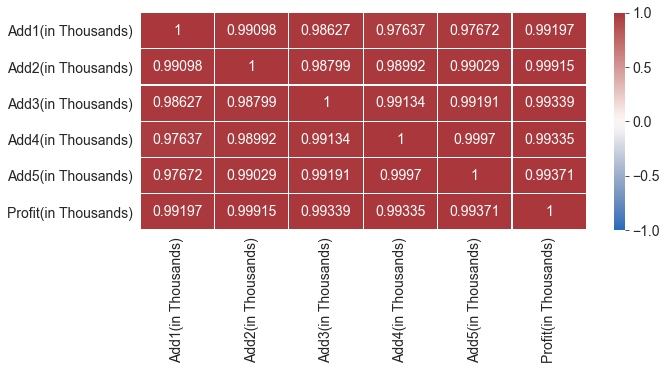

In [22]:
#Visualization of correlation matrix using Heatmap
plt.subplots(figsize=(10,4))
sns.heatmap(data1, fmt = '.5g', vmin = -1, vmax = 1, annot = True, linewidths = 0.2, cmap = 'vlag')

**Inference:  
Strong positive correlation between amount spent for advertising and profit generated taking all the 5 advertising companies into consideration.**

**Money spent for advertising increases the profit generated by the textile company.**

**Advertising has a strong positive impact on sales.**

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

Notes:  
If a line is plotted to predict profit for a given expenditure on Ads, line on the X & Y coordinates has the following formula: y = ax+b.  

On changing the values of a and b, then trying to move the line visually closer to the points, the approximate relationship between "Ads expenditure" and "Profit" is learnt.  

Once the measure of fit has been computed, try to modify a and b to improve the fit.  

Then it should be possible for a computer to determine a and b for the best fit line from a random guess.  

To compare the model's predictions with the actual targets the following method can be used:

- Calculate the difference between the targets and predictions i.e "residual".  
- Square all elements of the difference matrix to remove negative values.  
- Calculate the average of the elements in the resulting matrix.  
- Take the square root of the result.  
The result is known as the root mean squared error (RMSE).  

**Use the LinearRegression class from scikit-learn to find the best fit line using the ordinary least squares optimization technique.**

**Linear Regression using Scikit-learn**

In [23]:
#Create a new model object lr
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [24]:
#Pass a DataFrame
X = data.drop(['Profit(in Thousands)','Date'], axis=1)
y = data['Profit(in Thousands)']

In [25]:
from sklearn.model_selection import train_test_split

#Assigning random Train data(75%) and Test data(25%) from DataFrame to lr model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size = 0.25)

In [26]:
#fit method of the model to find the best fit line for the inputs and targets
model = lr.fit(X_train, y_train)

In [27]:
print(y_test)

148    5190.758
64     5239.060
170    5728.804
72     4890.723
25     4436.321
13     4434.805
79     5013.207
83     4980.446
3      4391.665
84     4925.861
137    5051.755
58     5133.766
130    4922.845
154    5017.503
192    5767.839
186    5861.830
115    5397.739
132    4907.560
44     4648.627
109    5577.150
67     5001.615
80     5043.705
45     4606.340
114    5378.379
107    5452.280
10     4411.775
122    5167.878
185    5903.253
33     4513.600
26     4451.999
161    5212.949
151    5146.949
0      4093.065
74     5113.337
193    5745.806
62     5234.487
35     4419.421
138    5247.011
40     4486.996
184    5962.336
173    5805.521
4      4350.683
28     4416.136
100    5131.898
112    5425.190
155    5078.636
175    5784.540
69     5030.451
179    6137.800
61     5088.455
91     4836.837
29     4482.183
Name: Profit(in Thousands), dtype: float64


In [28]:
y_test.describe()

count      52.000000
mean     5070.764904
std       495.742300
min      4093.065000
25%      4638.055250
50%      5065.195500
75%      5383.219000
max      6137.800000
Name: Profit(in Thousands), dtype: float64

In [29]:
y_train.describe()

count     153.000000
mean     5055.845902
std       485.461373
min      4042.448000
25%      4617.695000
50%      5108.626000
75%      5387.438000
max      6101.648000
Name: Profit(in Thousands), dtype: float64

In [30]:
predictions = model.predict(X_test)

**Comments:  
Model predicts 'profit' values by assigning 25% of given data as Test data.**

In [31]:
from sklearn.metrics import mean_squared_error
print('MSE is : ', mean_squared_error(y_test, predictions))

MSE is :  3.6984517772803643e-25


**Comments:  
Mean squared error value is very neglible which indicates that model is ideal and highly accurate in target predictions.**

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
- Add1(in Thousands) 290
- Add2(in Thousands) 312
- Add3(in Thousands) 309
- Add4(in Thousands) 298
- Add5(in Thousands) 320

In [32]:
make_predict = [[290,312,309,298,320]]
model.predict(make_predict).item()
print("Profit Predicted: ", model.predict(make_predict).item())

Profit Predicted:  5820.06


**Comments:  
This prediction indicates that a profit of 5820,060 is generated by spending the given amount for advertising.**

Insights:  
In this case study, from the dataset, scatterplots and pairplots give a clear exploratory analysis on the sales, profit and spending pattern on ads of the textile company.  
Kde gives insights about the mode and mean of the attributes.  
Heatmap provides statistical inferences and correlation.  
Linear Regression class from scikit-learn provides the best fit line using the ordinary least squares optimization technique.  
Sales and thereby profit of the company is maximum during the month of January. The company spends more in January for advertisements.  
Customers tends to get influenced by these ads. Ads spending is also maximum during January maybe some shopping offers and promotions during this month.  
Increase in sales of company during April-May. Then company doesnt spend much for ads during May-June. Sales decline considerably.  
Then during June-July considerable increase in sales. Festive seasonal sales. The company spends less for advertising during Aug-Nov and henceforth sales and profit is decreased.  
Despite spending more on Add2 advertising company, customer reach of Add2 is almost similar to other ad companies.  
It can be concluded that Ads promote sales to a great extend. 
Perfect Positive Linear Correlation between Ads and Profit.